In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv(r'C:\Users\ADMINI\Desktop\AAPL.csv')

In [4]:
# Extracting the 'Close' prices as the target variable
data = df[['Close']].values.astype(float)

# Normalizing the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Spliting the data into training and testing sets
train_size = int(len(data) * 0.80)
train_data, test_data = data[:train_size], data[train_size:]


In [5]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [6]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [7]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
6/6 [==============================] - 4s 23ms/step - loss: 0.1827
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 0.1298
Epoch 3/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0807
Epoch 4/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0360
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0108
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0129
Epoch 7/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0099
Epoch 8/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0065
Epoch 9/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0072
Epoch 10/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0055
Epoch 11/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0051
Epoch 12/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0046
Epoch 13/50
6/6 [==============================] - 0s 20ms/st

In [8]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

2/2 [==============================] - 1s 11ms/step - loss: 0.0087
Test Loss: 0.0087


In [9]:
predicted = model.predict(X_test)

# Inverse transform the predictions to the original scale
predicted = scaler.inverse_transform(predicted)

2/2 [==============================] - 1s 10ms/step


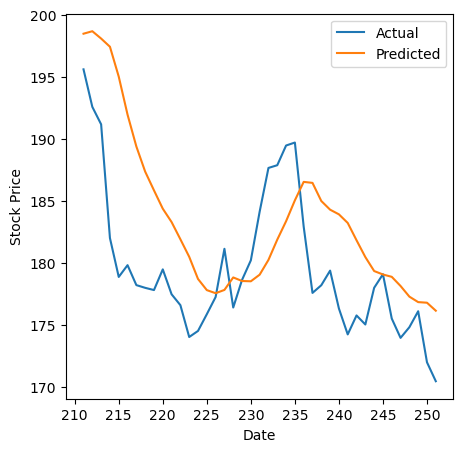

In [11]:
plt.figure(figsize=(5, 5))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual')
plt.plot(df.index[-len(y_test):], predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()